In [450]:
%config IPCompleter.greedy=True

In [465]:
%%javascript
require("notebook/js/notebook").Notebook.prototype.scroll_to_bottom = function () {}

<IPython.core.display.Javascript object>

### Import Library

In [452]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import io
import requests
import numpy as np;
import sklearn
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
np.random.seed(0)
sns.set()
pd.set_option("display.max_rows", None, "display.max_columns", None)
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## Step1: Acquire data

In [453]:
train_df = pd.read_csv('bh_train.csv')
test_df = pd.read_csv('bh_test.csv')
combine = [train_df, test_df]

## Step2: Analyze the dataset

In [459]:
train_df.shape,test_df.shape

((1460, 81), (1459, 80))

In [460]:
train_df.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

In [461]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [466]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# EXPLORATORY DATA ANALYSIS -- START

## Step3: Distribution of Missing Value feature

In [467]:
train_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [468]:
missing_feature = [items for items in train_df.columns if train_df[items].isna().sum()>0]

for item in missing_feature:
    print(item, np.round(train_df[item].isnull().mean(), 3),  ' % missing values')

LotFrontage 0.177  % missing values
Alley 0.938  % missing values
MasVnrType 0.005  % missing values
MasVnrArea 0.005  % missing values
BsmtQual 0.025  % missing values
BsmtCond 0.025  % missing values
BsmtExposure 0.026  % missing values
BsmtFinType1 0.025  % missing values
BsmtFinType2 0.026  % missing values
Electrical 0.001  % missing values
FireplaceQu 0.473  % missing values
GarageType 0.055  % missing values
GarageYrBlt 0.055  % missing values
GarageFinish 0.055  % missing values
GarageQual 0.055  % missing values
GarageCond 0.055  % missing values
PoolQC 0.995  % missing values
Fence 0.808  % missing values
MiscFeature 0.963  % missing values


### Observation: There are lots of missing values and we need to find the relationship with target variable (EDA OBS ID : EDA_OBS_1)

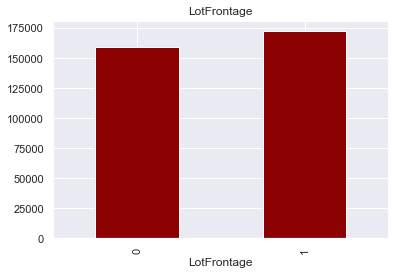

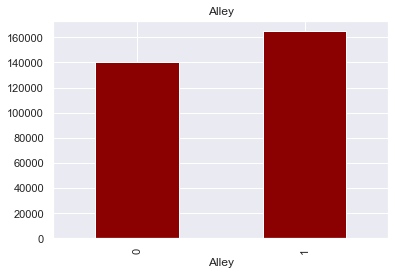

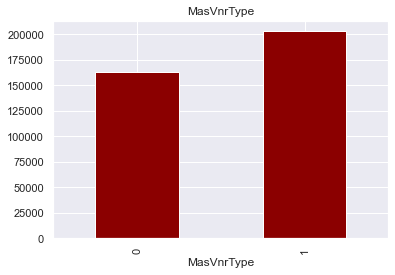

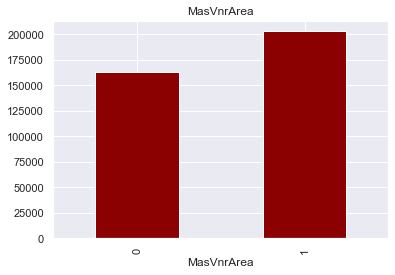

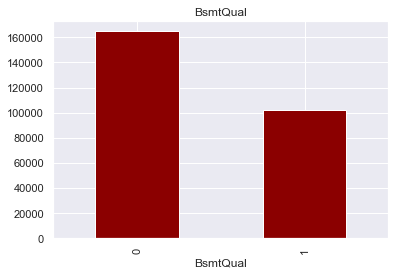

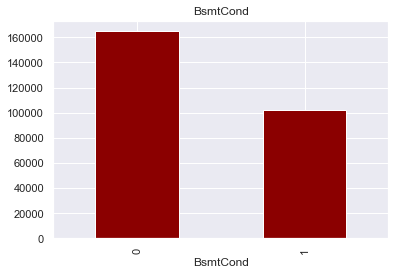

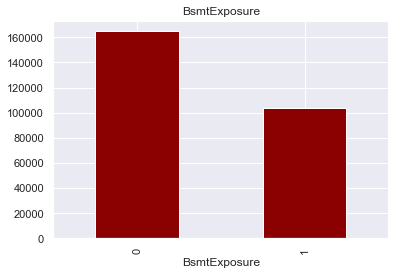

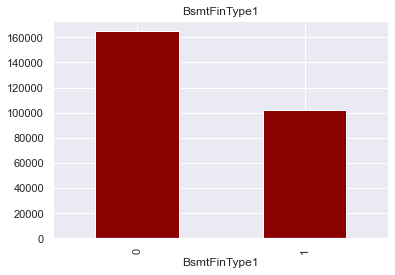

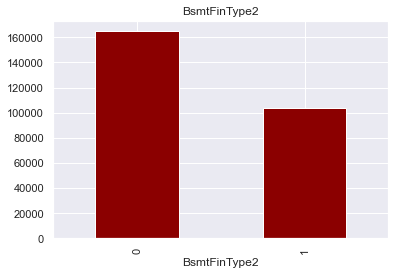

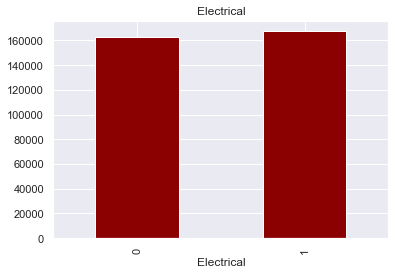

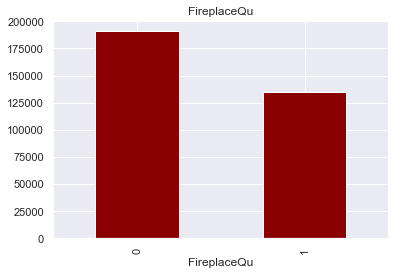

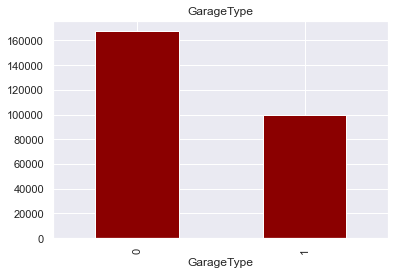

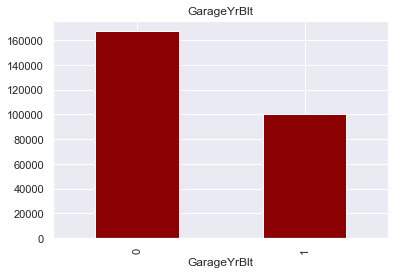

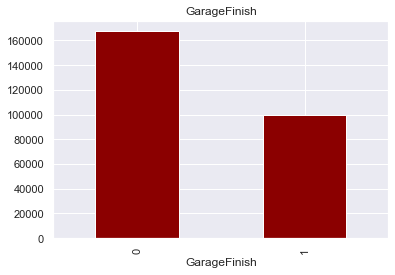

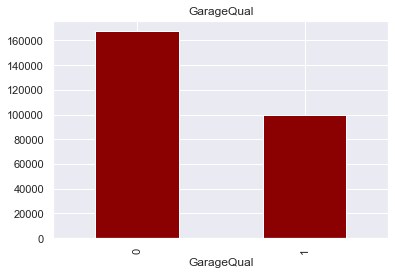

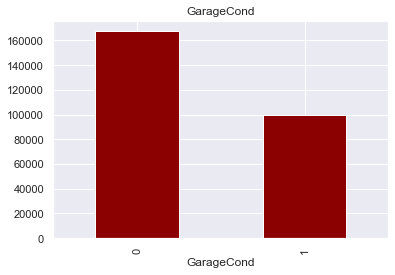

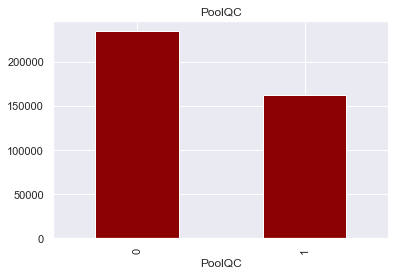

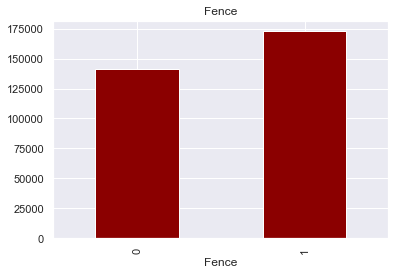

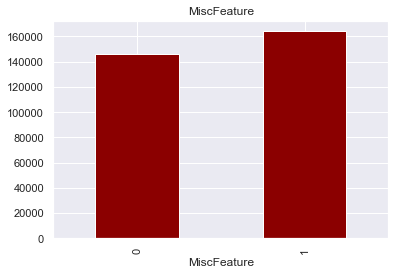

In [469]:
temp_train_df = train_df.copy()    
%matplotlib inline

for item in missing_feature:    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    temp_train_df[item] = np.where(temp_train_df[item].isnull(), 1, 0)
    temp_train_df.groupby(item)['SalePrice'].median().plot.bar( color='darkred')
    plt.title(item)
    plt.show()

### Observation: There exists a relationship between missing value and Target Variable i.e., Sales Price. In Feature Engineering Phase we willl be imputing all missing values using suitable imputers available in sklearn library (OBS ID : EDA_OBS_2)

## Step4: Count of Id column

In [470]:
print("Houses ID {}".format(len(train_df.Id)))

Houses ID 1460


### Observation: Since ID column dows not contribute in calculation, therefore we will be dropping in Feature Engineering(OBS ID : EDA_OBS_3)

## Step5: Distribution of Numerical feature

In [471]:
numerical_features = [item for item in train_df.columns if train_df[item].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
train_df[numerical_features].head()

Number of numerical variables:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


### Observation: There are 38 columns having numerical values and imputation will be done if Nan is found(OBS ID : EDA_OBS_4)

### Step6: Distribution  of Temporal feature feature

In [474]:
year_feature = [item for item in numerical_features if 'Yr' in item or 'Year' in item]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [476]:
for item in year_feature:
    print(item, train_df[item].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

### Observation: There are 4 columns having date values and removing multiple columns in date  (OBS ID : EDA_OBS_5)

### Step7: Multivariate Analysis

### Multivariate Analysis: Analysis between Sales Price(Target variable) with Sold Year with additional ammenities

Text(0.5, 1.0, 'Hourse Price verses Year Sold')

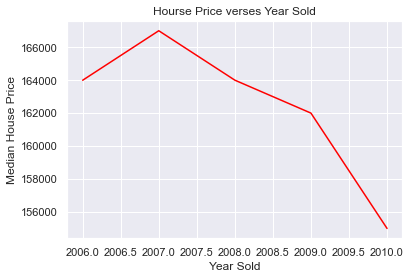

In [477]:
temp_train_df = train_df.copy()
temp_train_df .groupby('YrSold')['SalePrice'].median().plot( color='red')
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title('Hourse Price verses Year Sold')

### Observation: Initially Selling Price increased with Year but there is fall in price as the year progress. This can not be true and we need to investigate more in depth. Rather the comparing with Year sold we will compare with other variable related to year like year in which remodelling was done and year in which house was built. (OBS ID : EDA_OBS_6)

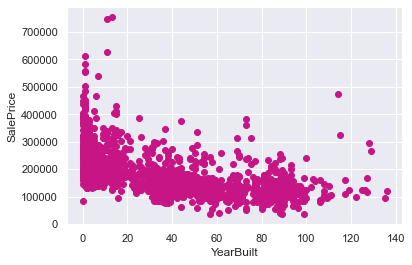

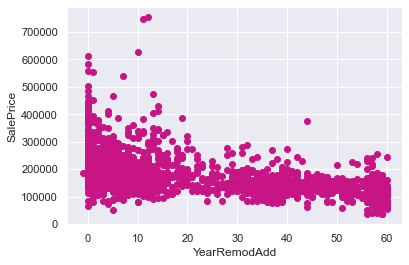

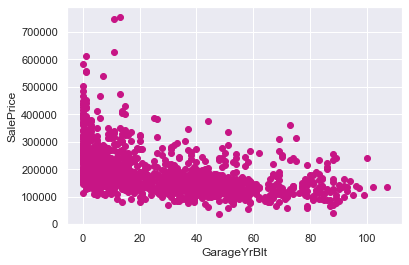

In [478]:
temp_train_df = train_df.copy()

for item in year_feature:
    if item != 'YrSold':
        temp_train_df[item]=temp_train_df['YrSold'] - temp_train_df[item]  #after how many years of house built or  modelled, the house was sold
        plt.scatter(temp_train_df[item],temp_train_df['SalePrice'], color='mediumvioletred')
        plt.xlabel(item)
        plt.ylabel('SalePrice')
        plt.show()

### Observation: From the above three scatter plot we can clearly see that the house which were built recently or house which were remodelled were sold at higher price.(OBS ID : EDA_OBS_7)

### Step8: Multivariate Analysis

### Multivariate Analysis: Analysis between Sales Price(Target variable) with numerical features. 
##### Numerical variables are usually of 2 type Continous variable and Discrete Variables
### Below is analysis with discreate variable

In [479]:
temp_train_df = train_df.copy()

discrete_feature=[item for item in numerical_features if len(temp_train_df[item].unique())<25 and item not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 17


In [480]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [481]:
temp_train_df[discrete_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


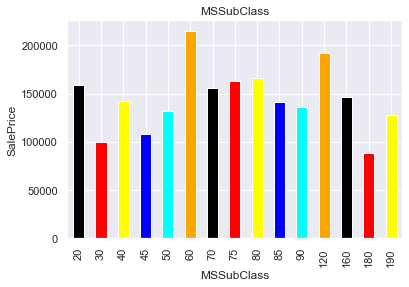

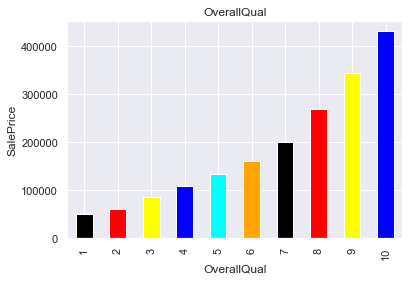

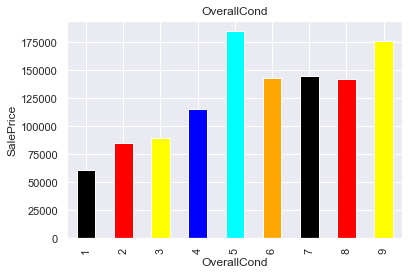

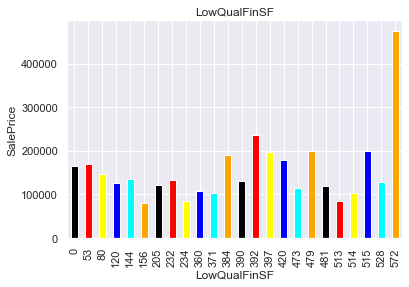

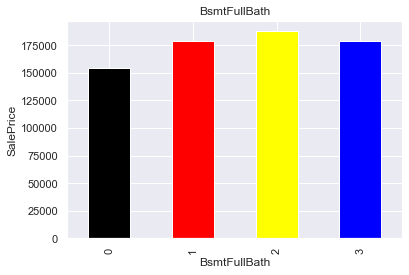

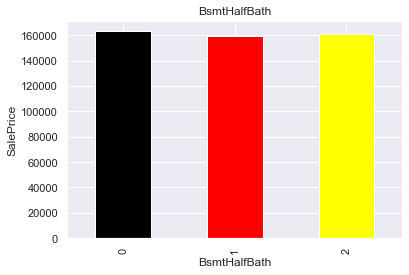

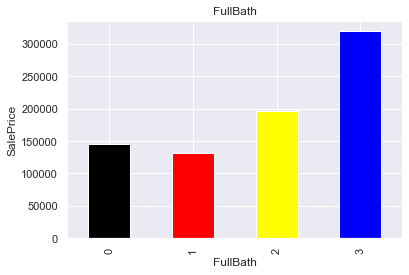

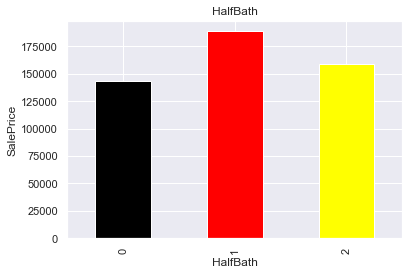

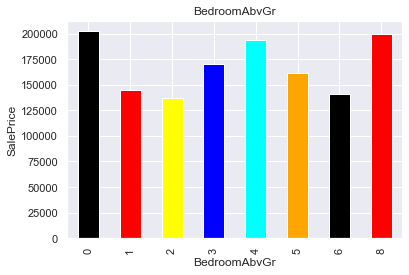

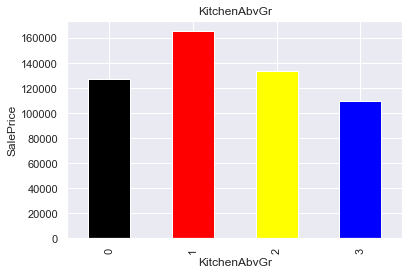

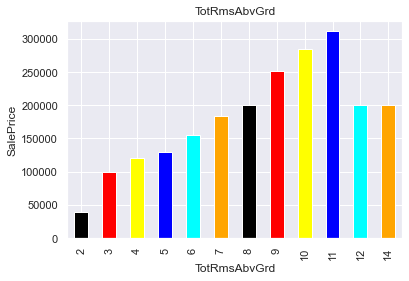

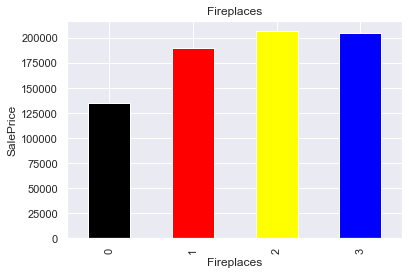

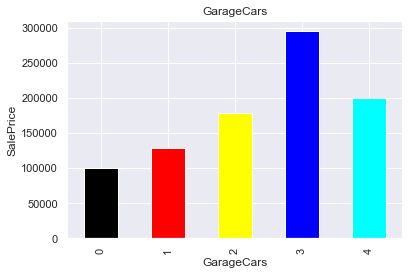

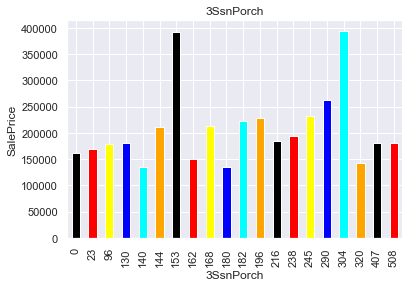

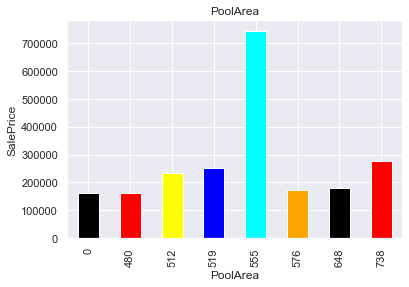

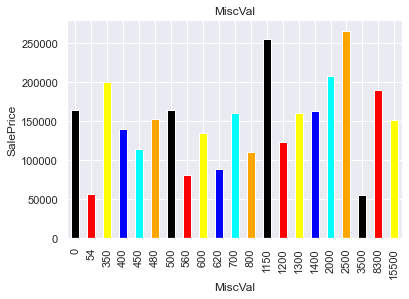

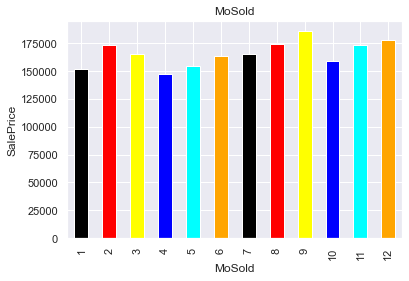

In [482]:
## Analysis between Sales Price(Target variable) with discreate features.
temp_train_df=train_df.copy()

for item in discrete_feature:
    temp_train_df.groupby(item)['SalePrice'].median().plot.bar(color=['black', 'red', 'yellow', 'blue', 'cyan','orange'])
    plt.xlabel(item)
    plt.ylabel('SalePrice')
    plt.title(item)
    plt.show()

### Observation: From the above histogram we found in some of the cases there is exponential relationship, in some cases it is normal or in some cases it is partially exponential. There are non linear relationship also. Therefore we can conclude that whese variables have some or large relationship with target variable Sale Price. We will explore more during feature selection phase.(OBS ID : EDA_OBS_7)

### Below is analysis with numerical variable:

In [483]:
#This which are not discreate are numerical
continuous_feature=[item for item in numerical_features if item not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 16


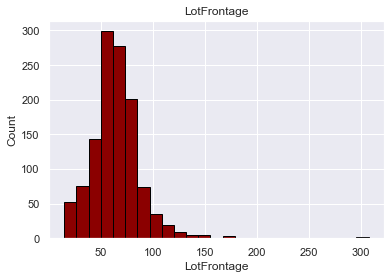

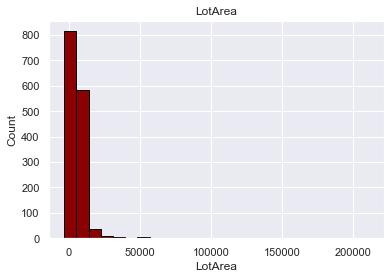

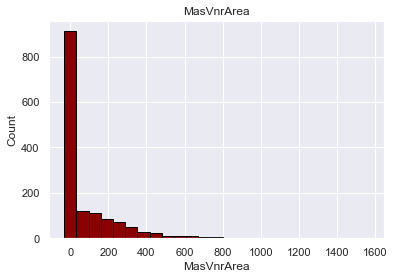

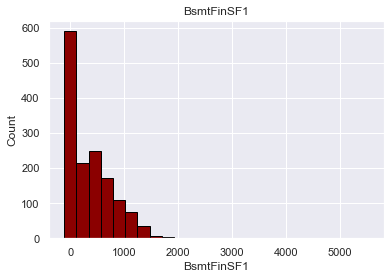

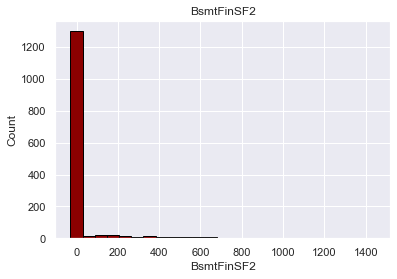

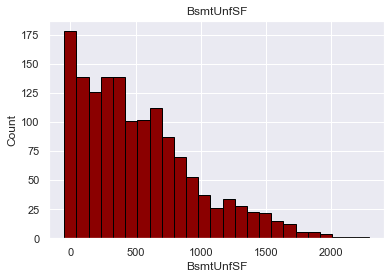

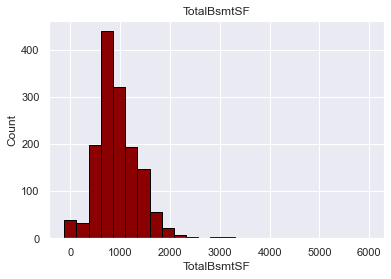

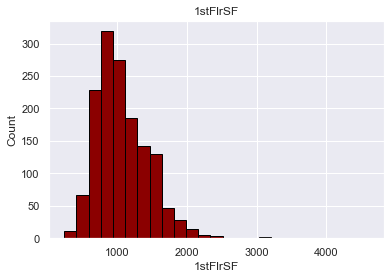

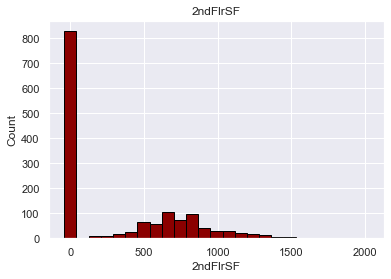

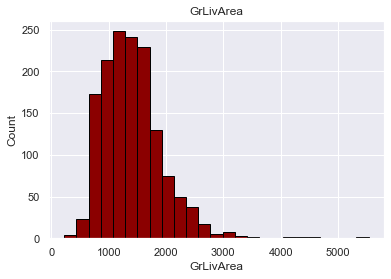

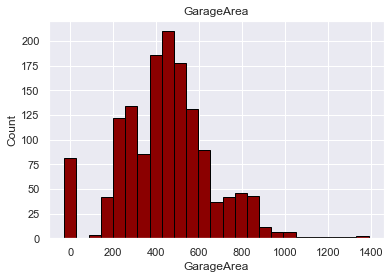

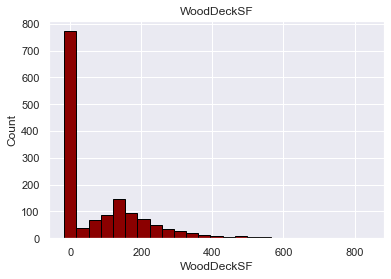

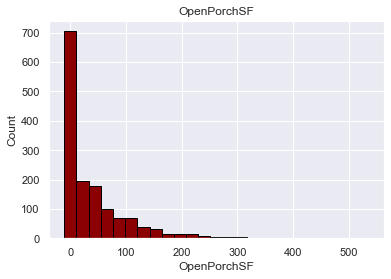

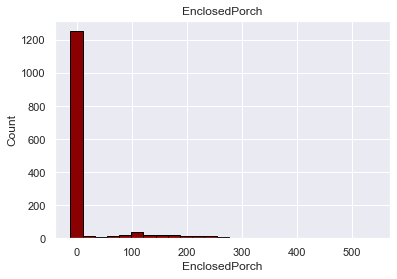

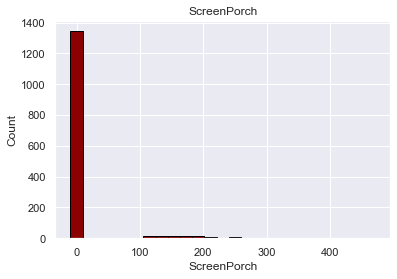

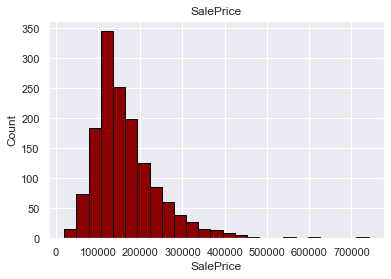

In [485]:
temp_train_df=train_df.copy()
%matplotlib inline
for item in continuous_feature:    
    temp_train_df[item].hist(bins=25,align='left', color='darkred', edgecolor='black',  linewidth=1)
    plt.xlabel(item)
    plt.ylabel("Count")
    plt.title(item)
    plt.show()

### Observation: From the above histogram we found that there is some skewness in some of the features. Therefore we will apply log normal(OBS ID : EDA_OBS_8)

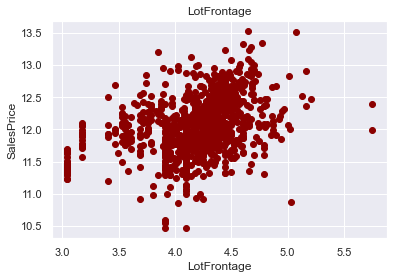

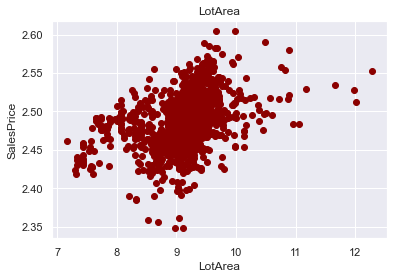

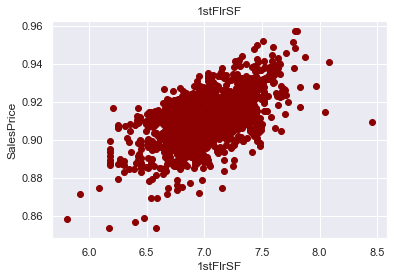

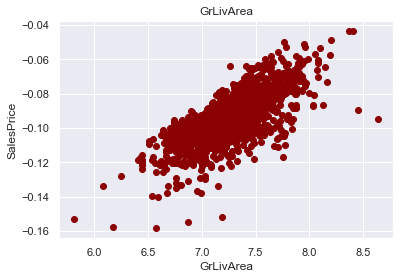

In [486]:
data=train_df.copy()
for item in continuous_feature:    
    if 0 in data[item].unique():
        pass #bypassing the cases 
    else:
         if(item != 'SalePrice'):
                data[item]=np.log(data[item])
                data['SalePrice']=np.log(data['SalePrice'])
                plt.scatter(data[item],data['SalePrice'],color='darkred')
                plt.xlabel(item)
                plt.ylabel('SalesPrice')
                plt.title(item)
                plt.show()

### Observation: After applying log normal transformation, we found that skewness got reduced and nearly normal distribution.(OBS ID : EDA_OBS_9)

### Step8: Outlier Analysis

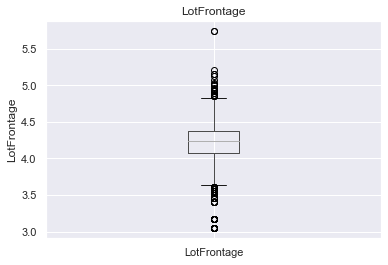

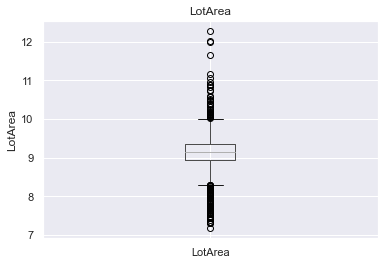

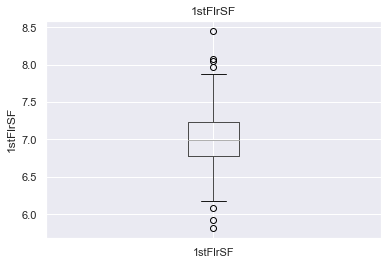

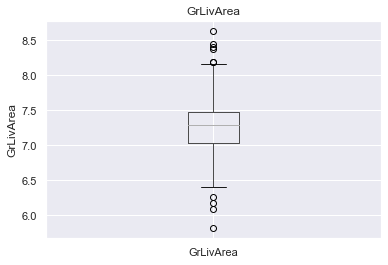

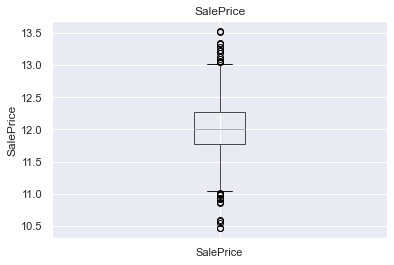

In [488]:
data=train_df.copy()

%matplotlib inline

for item in continuous_feature:    
    if 0 in data[item].unique():
        pass
    else:
        data[item]=np.log(data[item])
        data.boxplot(column=item)
        plt.ylabel(item)
        plt.title(item)
        plt.show()

### Observation: After applying boxplot, we found the outliers in continous variables and we will remove in feature engineering.(OBS ID : EDA_OBS_10)

### Step9: Categorical Features 

In [492]:
data=train_df.copy()
categorical_features=[feature for feature in data.columns if data[feature].dtypes=='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [493]:
data[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


## Finding number of category

In [494]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 15
The feature is Exterior2nd and number of categories are 16
The feature is MasVnrType and number of cate

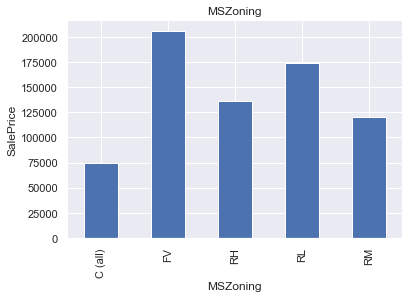

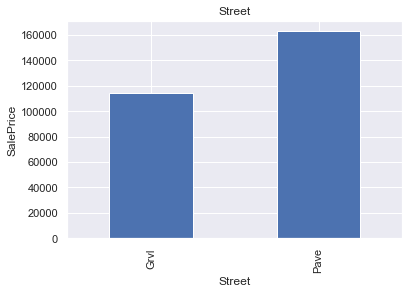

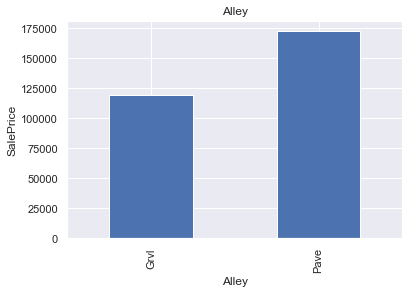

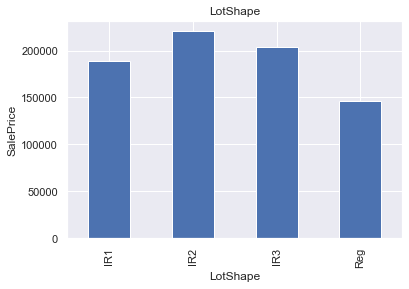

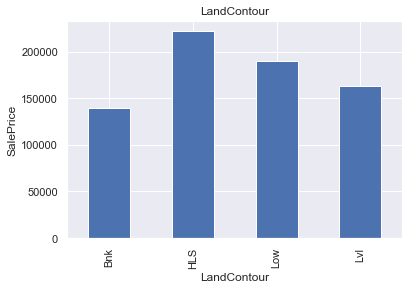

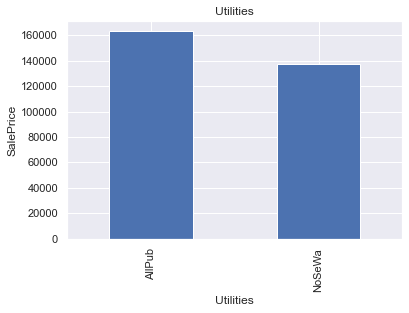

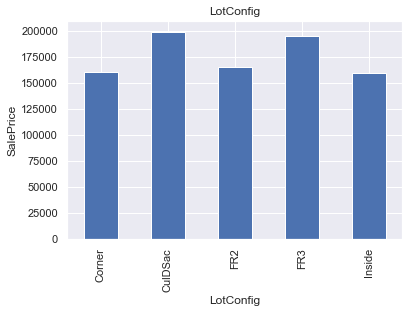

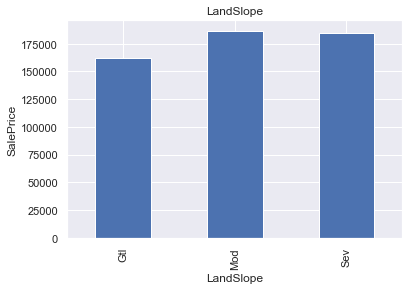

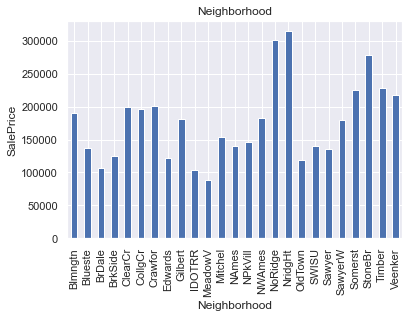

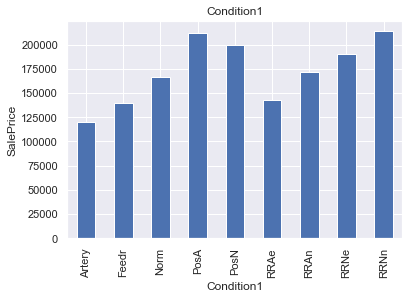

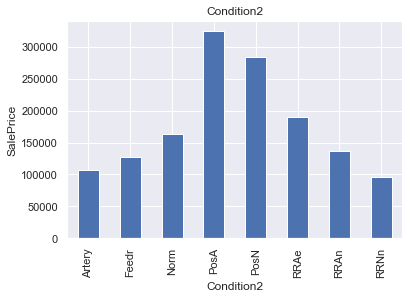

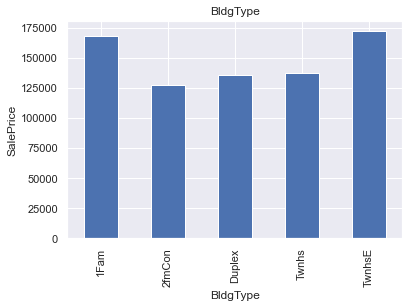

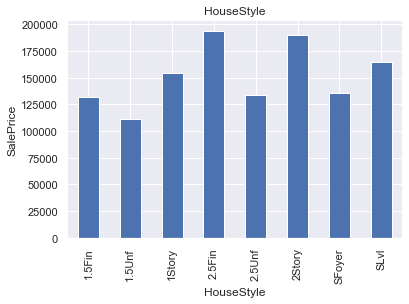

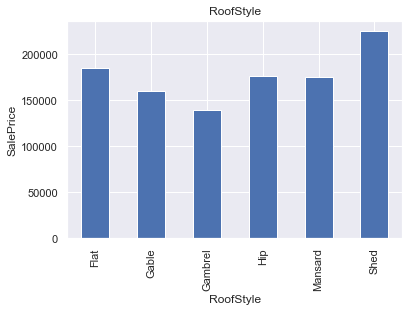

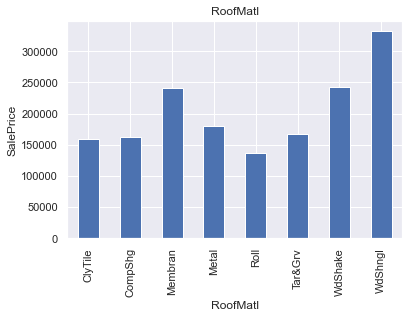

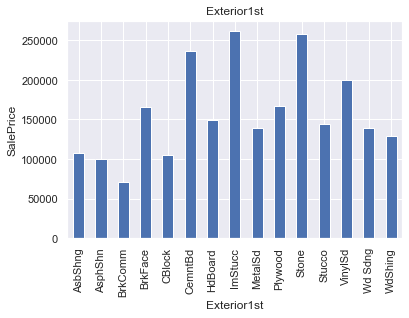

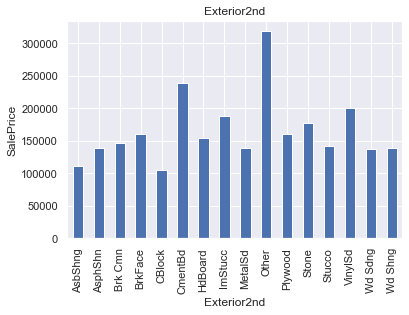

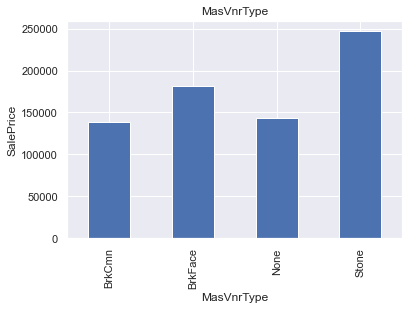

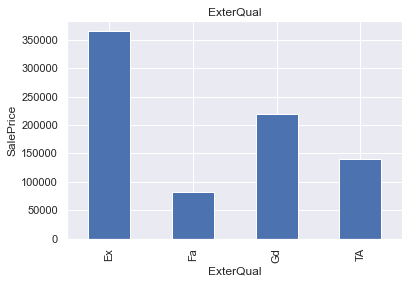

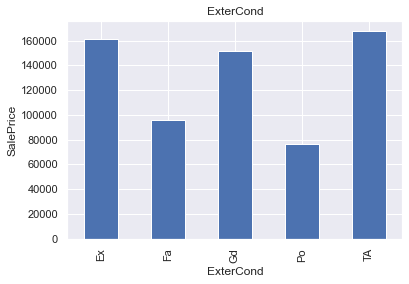

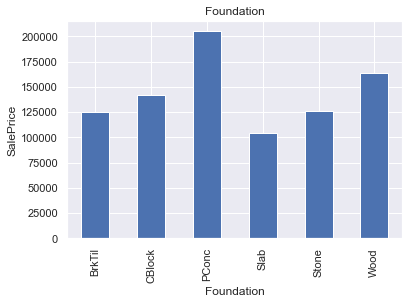

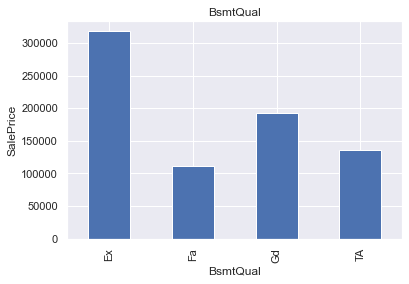

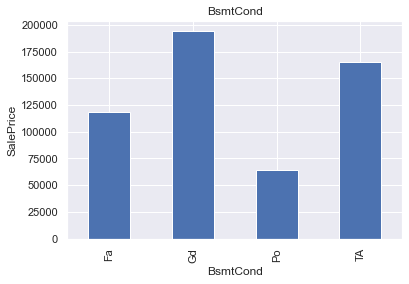

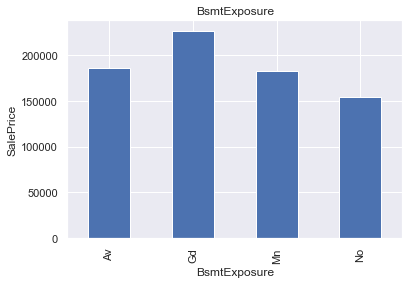

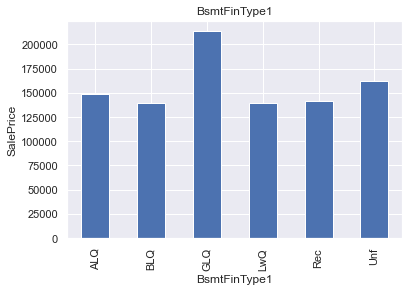

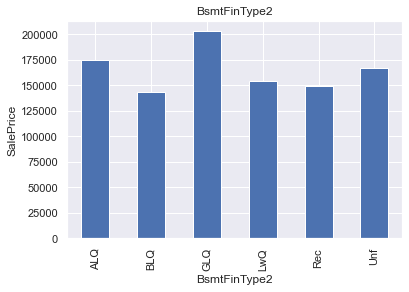

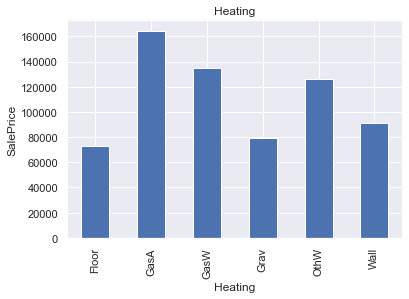

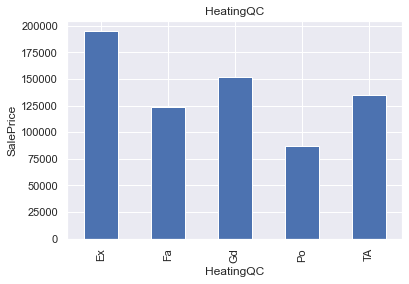

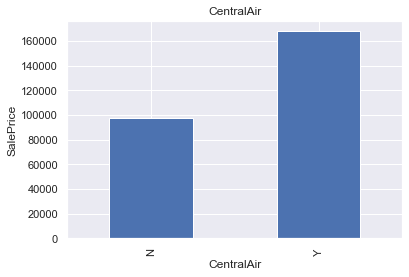

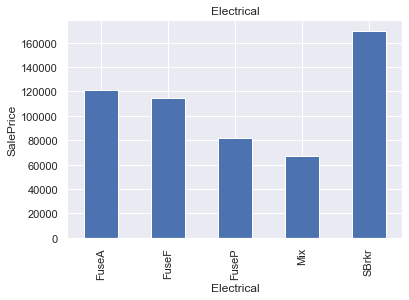

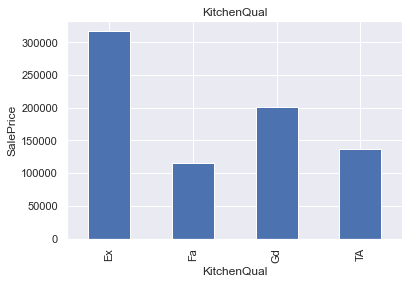

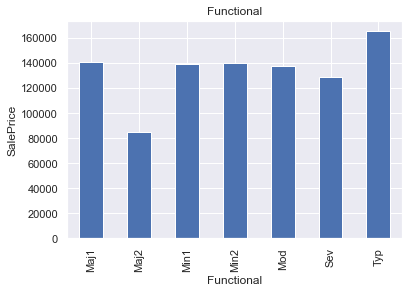

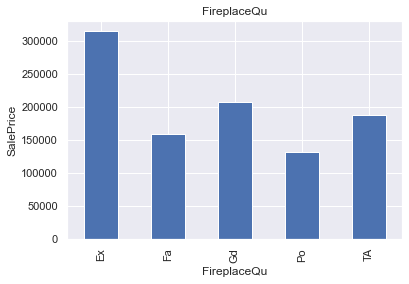

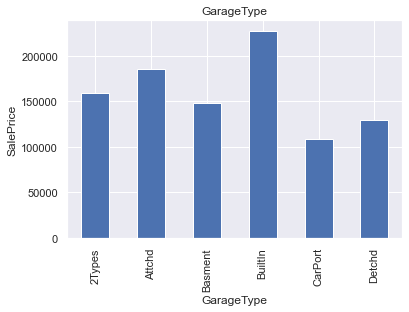

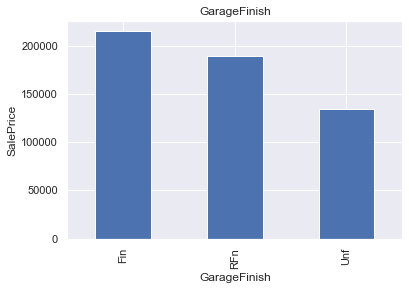

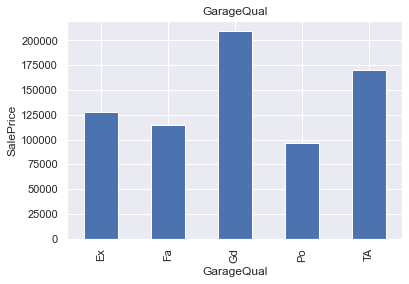

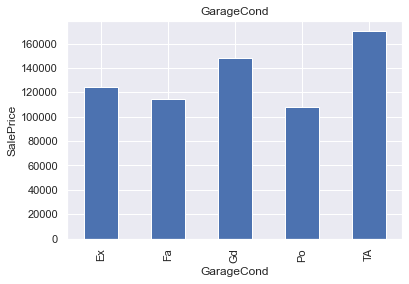

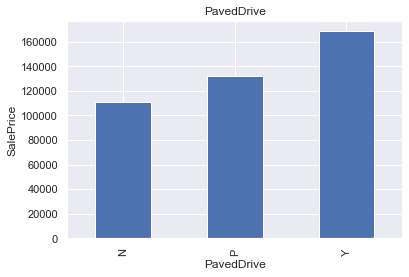

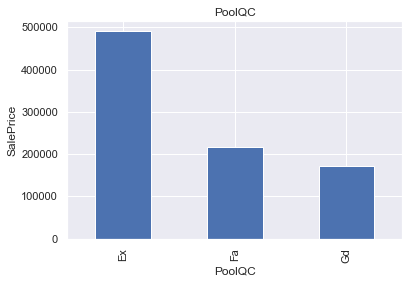

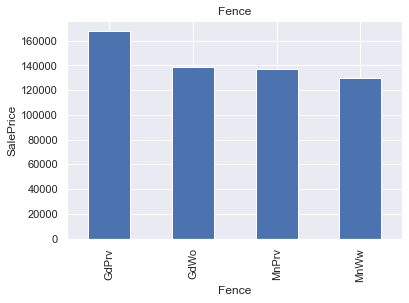

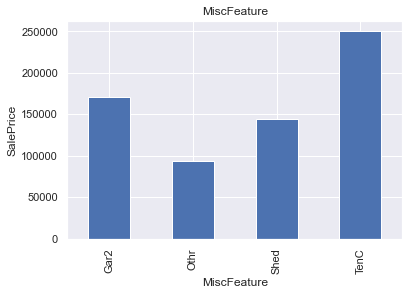

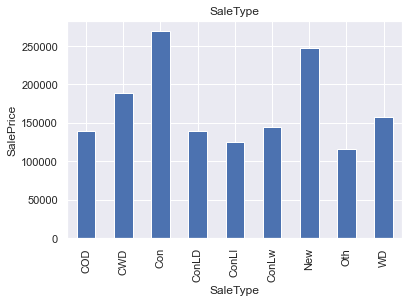

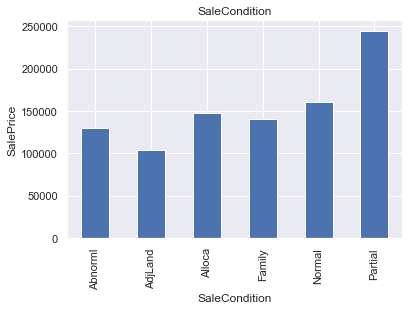

In [495]:
#data=dataset.copy()
%matplotlib inline
for item in categorical_features:
    data.groupby(item)['SalePrice'].median().plot.bar()
    plt.xlabel(item)
    plt.ylabel('SalePrice')
    plt.title(item)
    plt.show()

### Observation: From the above histogram we found in some of the cases there is exponential relationship, in some cases it is normal or in some cases it is partially exponential. There are non linear relationship also. Therefore we can conclude that whese variables have some or large relationship with target variable Sale Price. We will explore more during feature selection phase.(OBS ID : EDA_OBS_11)

# EXPLORATORY DATA ANALYSIS -- END

# FEATURE ENGINEERING -- START

## Step:9  Missing Value Imputation
### Imputation Step: Categorical Imputation followed by Numerical Imputation

In [542]:
train_df = pd.read_csv('bh_train.csv')
test_df = pd.read_csv('bh_test.csv')
combine = [train_df, test_df]

### Categorical Imputation

In [543]:
print('Test Data')    
features_nan_test=[item for item in test_df.columns if test_df[item].isnull().sum()>1 and test_df[item].dtypes=='O']

for item in features_nan_test:
    print("{}: {}% missing values".format(item,np.round(test_df[item].isnull().mean(),4)))
    


Test Data
MSZoning: 0.0027% missing values
Alley: 0.9267% missing values
Utilities: 0.0014% missing values
MasVnrType: 0.011% missing values
BsmtQual: 0.0302% missing values
BsmtCond: 0.0308% missing values
BsmtExposure: 0.0302% missing values
BsmtFinType1: 0.0288% missing values
BsmtFinType2: 0.0288% missing values
Functional: 0.0014% missing values
FireplaceQu: 0.5003% missing values
GarageType: 0.0521% missing values
GarageFinish: 0.0535% missing values
GarageQual: 0.0535% missing values
GarageCond: 0.0535% missing values
PoolQC: 0.9979% missing values
Fence: 0.8012% missing values
MiscFeature: 0.965% missing values


In [544]:
## Replace missing value with a new label
def replace_cat_feature(dataset,features_nan_test):
    data=dataset.copy()
    data[features_nan_test]=data[features_nan_test].fillna('Missing')
    return data

test_df=replace_cat_feature(test_df,features_nan_test)
test_df[features_nan_test].isnull().sum()

MSZoning        0
Alley           0
Utilities       0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [545]:
print('Train Data')    
features_nan=[item for item in train_df.columns if train_df[item].isnull().sum()>1 and train_df[item].dtypes=='O']

for item in features_nan:
    print("{}: {}% missing values".format(item,np.round(train_df[item].isnull().mean(),4)))

Train Data
Alley: 0.9377% missing values
MasVnrType: 0.0055% missing values
BsmtQual: 0.0253% missing values
BsmtCond: 0.0253% missing values
BsmtExposure: 0.026% missing values
BsmtFinType1: 0.0253% missing values
BsmtFinType2: 0.026% missing values
FireplaceQu: 0.4726% missing values
GarageType: 0.0555% missing values
GarageFinish: 0.0555% missing values
GarageQual: 0.0555% missing values
GarageCond: 0.0555% missing values
PoolQC: 0.9952% missing values
Fence: 0.8075% missing values
MiscFeature: 0.963% missing values


In [546]:
## Replace missing value with a new label
def replace_cat_feature(dataset,features_nan_test):
    data=dataset.copy()
    data[features_nan_test]=data[features_nan_test].fillna('Missing')
    return data

train_df=replace_cat_feature(train_df,features_nan)
train_df[features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

### Decision: The conventional categorical imputing method is used All the blank field in categorical values are imputed with missing.

### Related EDA ID:  EDA_OBS_1, EDA_OBS_2,

## Step:2 Categorical Variables: Handling Categorical variable using Custom Encoding through enumerating with dynamic variable or it can be one hot encoding

In [552]:
categorical_features=[feature for feature in train_df.columns if train_df[feature].dtype=='O']

for item in categorical_features:
    labels_ordered=train_df.groupby([item])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    train_df[item]=train_df[item].map(labels_ordered)
    
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,0,1,1,0,0,16,4,4,4,6,7,5,2003,2003,1,2,11,12,2,196.0,2,3,5,3,3,1,6,706,5,0,150,856,5,4,1,4.0,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,1,5,2003.0,2,2,548,3,5,2,0,61,0,0,0,0,0,4,3,0,2,2008,4,4,208500
1,2,20,3,80.0,9600,1,2,0,1,1,1,0,20,2,4,4,5,6,8,1976,1976,1,2,4,5,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,5,4,1,4.0,1262,0,0,1262,0,1,2,0,3,1,1,6,6,1,3,5,1976.0,2,2,460,3,5,2,298,0,0,0,0,0,0,4,3,0,5,2007,4,4,181500
2,3,60,3,68.0,11250,1,2,1,1,1,0,0,16,4,4,4,6,7,5,2001,2002,1,2,11,12,2,162.0,2,3,5,3,3,2,6,486,5,0,434,920,5,4,1,4.0,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,3,5,2001.0,2,2,608,3,5,2,0,42,0,0,0,0,0,4,3,0,9,2008,4,4,223500
3,4,70,3,60.0,9550,1,2,1,1,1,2,0,17,4,4,4,6,7,5,1915,1970,1,2,5,8,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,5,3,1,4.0,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,4,2,1998.0,1,3,642,3,5,2,0,35,272,0,0,0,0,4,3,0,2,2006,4,1,140000
4,5,60,3,84.0,14260,1,2,1,1,1,1,0,24,4,4,4,6,8,5,2000,2000,1,2,11,12,2,350.0,2,3,5,3,3,3,6,655,5,0,490,1145,5,4,1,4.0,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,3,5,2000.0,2,3,836,3,5,2,192,84,0,0,0,0,0,4,3,0,12,2008,4,4,250000


In [553]:
categorical_features=[feature for feature in test_df.columns if test_df[feature].dtype=='O']

for item in categorical_features:
    labels_ordered=test_df.groupby([item])['Id'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    test_df[item]=test_df[item].map(labels_ordered)
    
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,0,80.0,11622,1,1,2,0,1,2,1,12,5,2,3,0,5,6,1961,1961,3,0,1.0,4.0,2,0.0,3,2,2,3,1,0,2,468.0,0,144.0,270.0,882.0,2,1,0,0,896,0,0,896,0.0,0.0,1,0,2,1,2.0,5,2,0,3,2,1961.0,2,1.0,730.0,1,1,1,140,0,0,0,120,0,0,4,2,0,6,2010,5.0,1
1,1462,20,2,81.0,14267,1,1,1,0,1,1,1,12,4,2,3,0,6,6,1958,1958,1,0,6.0,9.0,1,108.0,3,2,2,3,1,0,3,923.0,4,0.0,406.0,1329.0,2,1,0,0,1329,0,0,1329,0.0,0.0,1,1,3,1,1.0,6,2,0,3,2,1958.0,2,1.0,312.0,1,1,1,393,36,0,0,0,0,0,2,1,12500,6,2010,5.0,1
2,1463,60,2,74.0,13830,1,1,1,0,1,2,1,2,4,2,3,1,5,5,1997,1998,3,0,1.0,4.0,2,0.0,3,2,0,1,1,0,0,791.0,4,0.0,137.0,928.0,2,3,0,0,928,701,0,1629,0.0,0.0,2,1,3,1,2.0,6,2,1,1,2,1997.0,0,2.0,482.0,1,1,1,212,34,0,0,0,0,0,4,2,0,3,2010,5.0,1
3,1464,60,2,78.0,9978,1,1,1,0,1,2,1,2,4,2,3,1,6,6,1998,1998,3,0,1.0,4.0,1,20.0,3,2,0,3,1,0,0,602.0,4,0.0,324.0,926.0,2,0,0,0,926,678,0,1604,0.0,0.0,2,1,3,1,1.0,7,2,1,0,2,1998.0,0,2.0,470.0,1,1,1,360,36,0,0,0,0,0,2,2,0,6,2010,5.0,1
4,1465,120,2,43.0,5005,1,1,1,2,1,2,1,14,4,2,0,0,8,5,1992,1992,3,0,4.0,5.0,2,0.0,2,2,0,1,1,0,3,263.0,4,0.0,1017.0,1280.0,2,0,0,0,1280,0,0,1280,0.0,0.0,2,0,2,1,1.0,5,2,0,3,2,1992.0,1,2.0,506.0,1,1,1,0,82,0,0,144,0,0,2,2,0,1,2010,5.0,1


### Decision: Post Missing Value Imputation, we found that cateogical values in data which we converted to numerical before we feed the data to algorithm.

### Related EDA ID: EDA_OBS_1, EDA_OBS_2

### Numerical Imputation

In [554]:
imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)
new_array=imputer.fit_transform(train_df) # impute the missing values
#convert the nd-array returned in the step above to a Dataframe
train_df=pd.DataFrame(data=np.round(new_array), columns=train_df.columns)
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,3.0,65.0,8450.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,16.0,4.0,4.0,4.0,6.0,7.0,5.0,2003.0,2003.0,1.0,2.0,11.0,12.0,2.0,196.0,2.0,3.0,5.0,3.0,3.0,1.0,6.0,706.0,5.0,0.0,150.0,856.0,5.0,4.0,1.0,4.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,2.0,8.0,6.0,0.0,1.0,5.0,2003.0,2.0,2.0,548.0,3.0,5.0,2.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,2.0,2008.0,4.0,4.0,208500.0
1,2.0,20.0,3.0,80.0,9600.0,1.0,2.0,0.0,1.0,1.0,1.0,0.0,20.0,2.0,4.0,4.0,5.0,6.0,8.0,1976.0,1976.0,1.0,2.0,4.0,5.0,1.0,0.0,1.0,3.0,2.0,3.0,3.0,4.0,4.0,978.0,5.0,0.0,284.0,1262.0,5.0,4.0,1.0,4.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,1.0,6.0,6.0,1.0,3.0,5.0,1976.0,2.0,2.0,460.0,3.0,5.0,2.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,5.0,2007.0,4.0,4.0,181500.0
2,3.0,60.0,3.0,68.0,11250.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,16.0,4.0,4.0,4.0,6.0,7.0,5.0,2001.0,2002.0,1.0,2.0,11.0,12.0,2.0,162.0,2.0,3.0,5.0,3.0,3.0,2.0,6.0,486.0,5.0,0.0,434.0,920.0,5.0,4.0,1.0,4.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,2.0,6.0,6.0,1.0,3.0,5.0,2001.0,2.0,2.0,608.0,3.0,5.0,2.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,9.0,2008.0,4.0,4.0,223500.0
3,4.0,70.0,3.0,60.0,9550.0,1.0,2.0,1.0,1.0,1.0,2.0,0.0,17.0,4.0,4.0,4.0,6.0,7.0,5.0,1915.0,1970.0,1.0,2.0,5.0,8.0,1.0,0.0,1.0,3.0,1.0,2.0,4.0,1.0,4.0,216.0,5.0,0.0,540.0,756.0,5.0,3.0,1.0,4.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,2.0,7.0,6.0,1.0,4.0,2.0,1998.0,1.0,3.0,642.0,3.0,5.0,2.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,2.0,2006.0,4.0,1.0,140000.0
4,5.0,60.0,3.0,84.0,14260.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,24.0,4.0,4.0,4.0,6.0,8.0,5.0,2000.0,2000.0,1.0,2.0,11.0,12.0,2.0,350.0,2.0,3.0,5.0,3.0,3.0,3.0,6.0,655.0,5.0,0.0,490.0,1145.0,5.0,4.0,1.0,4.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,2.0,9.0,6.0,1.0,3.0,5.0,2000.0,2.0,3.0,836.0,3.0,5.0,2.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,12.0,2008.0,4.0,4.0,250000.0


In [555]:
imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)
new_array=imputer.fit_transform(test_df) # impute the missing values
#convert the nd-array returned in the step above to a Dataframe
test_df=pd.DataFrame(data=np.round(new_array), columns=test_df.columns)
test_df.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461.0,20.0,0.0,80.0,11622.0,1.0,1.0,2.0,0.0,1.0,2.0,1.0,12.0,5.0,2.0,3.0,0.0,5.0,6.0,1961.0,1961.0,3.0,0.0,1.0,4.0,2.0,0.0,3.0,2.0,2.0,3.0,1.0,0.0,2.0,468.0,0.0,144.0,270.0,882.0,2.0,1.0,0.0,0.0,896.0,0.0,0.0,896.0,0.0,0.0,1.0,0.0,2.0,1.0,2.0,5.0,2.0,0.0,3.0,2.0,1961.0,2.0,1.0,730.0,1.0,1.0,1.0,140.0,0.0,0.0,0.0,120.0,0.0,0.0,4.0,2.0,0.0,6.0,2010.0,5.0,1.0
1,1462.0,20.0,2.0,81.0,14267.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,12.0,4.0,2.0,3.0,0.0,6.0,6.0,1958.0,1958.0,1.0,0.0,6.0,9.0,1.0,108.0,3.0,2.0,2.0,3.0,1.0,0.0,3.0,923.0,4.0,0.0,406.0,1329.0,2.0,1.0,0.0,0.0,1329.0,0.0,0.0,1329.0,0.0,0.0,1.0,1.0,3.0,1.0,1.0,6.0,2.0,0.0,3.0,2.0,1958.0,2.0,1.0,312.0,1.0,1.0,1.0,393.0,36.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,12500.0,6.0,2010.0,5.0,1.0
2,1463.0,60.0,2.0,74.0,13830.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,2.0,4.0,2.0,3.0,1.0,5.0,5.0,1997.0,1998.0,3.0,0.0,1.0,4.0,2.0,0.0,3.0,2.0,0.0,1.0,1.0,0.0,0.0,791.0,4.0,0.0,137.0,928.0,2.0,3.0,0.0,0.0,928.0,701.0,0.0,1629.0,0.0,0.0,2.0,1.0,3.0,1.0,2.0,6.0,2.0,1.0,1.0,2.0,1997.0,0.0,2.0,482.0,1.0,1.0,1.0,212.0,34.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,3.0,2010.0,5.0,1.0
3,1464.0,60.0,2.0,78.0,9978.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,2.0,4.0,2.0,3.0,1.0,6.0,6.0,1998.0,1998.0,3.0,0.0,1.0,4.0,1.0,20.0,3.0,2.0,0.0,3.0,1.0,0.0,0.0,602.0,4.0,0.0,324.0,926.0,2.0,0.0,0.0,0.0,926.0,678.0,0.0,1604.0,0.0,0.0,2.0,1.0,3.0,1.0,1.0,7.0,2.0,1.0,0.0,2.0,1998.0,0.0,2.0,470.0,1.0,1.0,1.0,360.0,36.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,6.0,2010.0,5.0,1.0
4,1465.0,120.0,2.0,43.0,5005.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,14.0,4.0,2.0,0.0,0.0,8.0,5.0,1992.0,1992.0,3.0,0.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0,1.0,1.0,0.0,3.0,263.0,4.0,0.0,1017.0,1280.0,2.0,0.0,0.0,0.0,1280.0,0.0,0.0,1280.0,0.0,0.0,2.0,0.0,2.0,1.0,1.0,5.0,2.0,0.0,3.0,2.0,1992.0,1.0,2.0,506.0,1.0,1.0,1.0,0.0,82.0,0.0,0.0,144.0,0.0,0.0,2.0,2.0,0.0,1.0,2010.0,5.0,1.0
5,1466.0,60.0,2.0,75.0,10000.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0,4.0,2.0,3.0,1.0,6.0,5.0,1993.0,1994.0,3.0,0.0,4.0,5.0,2.0,0.0,3.0,2.0,0.0,1.0,1.0,0.0,4.0,0.0,4.0,0.0,763.0,763.0,2.0,3.0,0.0,0.0,763.0,892.0,0.0,1655.0,0.0,0.0,2.0,1.0,3.0,1.0,2.0,7.0,2.0,1.0,1.0,2.0,1993.0,0.0,2.0,440.0,1.0,1.0,1.0,157.0,84.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,4.0,2010.0,5.0,1.0
6,1467.0,20.0,2.0,69.0,7980.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,2.0,4.0,2.0,3.0,0.0,6.0,7.0,1992.0,2007.0,3.0,0.0,4.0,5.0,2.0,0.0,3.0,1.0,0.0,1.0,1.0,0.0,3.0,935.0,4.0,0.0,233.0,1168.0,2.0,0.0,0.0,0.0,1187.0,0.0,0.0,1187.0,1.0,0.0,2.0,0.0,3.0,1.0,2.0,6.0,2.0,0.0,3.0,2.0,1992.0,0.0,2.0,420.0,1.0,1.0,1.0,483.0,21.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,500.0,3.0,2010.0,5.0,1.0
7,1468.0,60.0,2.0,63.0,8402.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,2.0,4.0,2.0,3.0,1.0,6.0,5.0,1998.0,1998.0,3.0,0.0,1.0,4.0,2.0,0.0,3.0,2.0,0.0,1.0,1.0,0.0,4.0,0.0,4.0,0.0,789.0,789.0,2.0,3.0,0.0,0.0,789.0,676.0,0.0,1465.0,0.0,0.0,2.0,1.0,3.0,1.0,2.0,7.0,2.0,1.0,0.0,2.0,1998.0,0.0,2.0,393.0,1.0,1.0,1.0,0.0,75.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,5.0,2010.0,5.0,1.0
8,1469.0,20.0,2.0,85.0,10176.0,1.0,1.0,2.0,0.0,1.0,2.0,1.0,2.0,4.0,2.0,3.0,0.0,7.0,5.0,1990.0,1990.0,3.0,0.0,4.0,5.0,2.0,0.0,3.0,2.0,0.0,1.0,1.0,1.0,0.0,637.0,4.0,0.0,663.0,1300.0,2.0,3.0,0.0,0.0,1341.0,0.0,0.0,1341.0,1.0,0.0,1.0,1.0,2.0,1.0,1.0,5.0,2.0,1.0,4.0,

### Decision: The numerical imputation is done using KNNImputer.
### Related EDA ID: EDA_OBS_4,EDA_OBS_6,EDA_OBS_7

### Step:10 Temporal Variables: Converting ['YearBuilt','YearRemodAdd','GarageYrBlt'] to numeric for standatization

In [556]:
## Temporal Variables (Date Time Variables) ---

for item in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    train_df[item]=train_df['YrSold']-train_df[item]
    
## Temporal Variables (Date Time Variables) ---

for item in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    test_df[item]=test_df['YrSold']-test_df[item]

In [557]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,3.0,65.0,8450.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,16.0,4.0,4.0,4.0,6.0,7.0,5.0,5.0,5.0,1.0,2.0,11.0,12.0,2.0,196.0,2.0,3.0,5.0,3.0,3.0,1.0,6.0,706.0,5.0,0.0,150.0,856.0,5.0,4.0,1.0,4.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,2.0,8.0,6.0,0.0,1.0,5.0,5.0,2.0,2.0,548.0,3.0,5.0,2.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,2.0,2008.0,4.0,4.0,208500.0
1,2.0,20.0,3.0,80.0,9600.0,1.0,2.0,0.0,1.0,1.0,1.0,0.0,20.0,2.0,4.0,4.0,5.0,6.0,8.0,31.0,31.0,1.0,2.0,4.0,5.0,1.0,0.0,1.0,3.0,2.0,3.0,3.0,4.0,4.0,978.0,5.0,0.0,284.0,1262.0,5.0,4.0,1.0,4.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,1.0,6.0,6.0,1.0,3.0,5.0,31.0,2.0,2.0,460.0,3.0,5.0,2.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,5.0,2007.0,4.0,4.0,181500.0
2,3.0,60.0,3.0,68.0,11250.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,16.0,4.0,4.0,4.0,6.0,7.0,5.0,7.0,6.0,1.0,2.0,11.0,12.0,2.0,162.0,2.0,3.0,5.0,3.0,3.0,2.0,6.0,486.0,5.0,0.0,434.0,920.0,5.0,4.0,1.0,4.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,2.0,6.0,6.0,1.0,3.0,5.0,7.0,2.0,2.0,608.0,3.0,5.0,2.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,9.0,2008.0,4.0,4.0,223500.0
3,4.0,70.0,3.0,60.0,9550.0,1.0,2.0,1.0,1.0,1.0,2.0,0.0,17.0,4.0,4.0,4.0,6.0,7.0,5.0,91.0,36.0,1.0,2.0,5.0,8.0,1.0,0.0,1.0,3.0,1.0,2.0,4.0,1.0,4.0,216.0,5.0,0.0,540.0,756.0,5.0,3.0,1.0,4.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,2.0,7.0,6.0,1.0,4.0,2.0,8.0,1.0,3.0,642.0,3.0,5.0,2.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,2.0,2006.0,4.0,1.0,140000.0
4,5.0,60.0,3.0,84.0,14260.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,24.0,4.0,4.0,4.0,6.0,8.0,5.0,8.0,8.0,1.0,2.0,11.0,12.0,2.0,350.0,2.0,3.0,5.0,3.0,3.0,3.0,6.0,655.0,5.0,0.0,490.0,1145.0,5.0,4.0,1.0,4.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,2.0,9.0,6.0,1.0,3.0,5.0,8.0,2.0,3.0,836.0,3.0,5.0,2.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,12.0,2008.0,4.0,4.0,250000.0


In [558]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461.0,20.0,0.0,80.0,11622.0,1.0,1.0,2.0,0.0,1.0,2.0,1.0,12.0,5.0,2.0,3.0,0.0,5.0,6.0,49.0,49.0,3.0,0.0,1.0,4.0,2.0,0.0,3.0,2.0,2.0,3.0,1.0,0.0,2.0,468.0,0.0,144.0,270.0,882.0,2.0,1.0,0.0,0.0,896.0,0.0,0.0,896.0,0.0,0.0,1.0,0.0,2.0,1.0,2.0,5.0,2.0,0.0,3.0,2.0,49.0,2.0,1.0,730.0,1.0,1.0,1.0,140.0,0.0,0.0,0.0,120.0,0.0,0.0,4.0,2.0,0.0,6.0,2010.0,5.0,1.0
1,1462.0,20.0,2.0,81.0,14267.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,12.0,4.0,2.0,3.0,0.0,6.0,6.0,52.0,52.0,1.0,0.0,6.0,9.0,1.0,108.0,3.0,2.0,2.0,3.0,1.0,0.0,3.0,923.0,4.0,0.0,406.0,1329.0,2.0,1.0,0.0,0.0,1329.0,0.0,0.0,1329.0,0.0,0.0,1.0,1.0,3.0,1.0,1.0,6.0,2.0,0.0,3.0,2.0,52.0,2.0,1.0,312.0,1.0,1.0,1.0,393.0,36.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,12500.0,6.0,2010.0,5.0,1.0
2,1463.0,60.0,2.0,74.0,13830.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,2.0,4.0,2.0,3.0,1.0,5.0,5.0,13.0,12.0,3.0,0.0,1.0,4.0,2.0,0.0,3.0,2.0,0.0,1.0,1.0,0.0,0.0,791.0,4.0,0.0,137.0,928.0,2.0,3.0,0.0,0.0,928.0,701.0,0.0,1629.0,0.0,0.0,2.0,1.0,3.0,1.0,2.0,6.0,2.0,1.0,1.0,2.0,13.0,0.0,2.0,482.0,1.0,1.0,1.0,212.0,34.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,3.0,2010.0,5.0,1.0
3,1464.0,60.0,2.0,78.0,9978.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,2.0,4.0,2.0,3.0,1.0,6.0,6.0,12.0,12.0,3.0,0.0,1.0,4.0,1.0,20.0,3.0,2.0,0.0,3.0,1.0,0.0,0.0,602.0,4.0,0.0,324.0,926.0,2.0,0.0,0.0,0.0,926.0,678.0,0.0,1604.0,0.0,0.0,2.0,1.0,3.0,1.0,1.0,7.0,2.0,1.0,0.0,2.0,12.0,0.0,2.0,470.0,1.0,1.0,1.0,360.0,36.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,6.0,2010.0,5.0,1.0
4,1465.0,120.0,2.0,43.0,5005.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,14.0,4.0,2.0,0.0,0.0,8.0,5.0,18.0,18.0,3.0,0.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0,1.0,1.0,0.0,3.0,263.0,4.0,0.0,1017.0,1280.0,2.0,0.0,0.0,0.0,1280.0,0.0,0.0,1280.0,0.0,0.0,2.0,0.0,2.0,1.0,1.0,5.0,2.0,0.0,3.0,2.0,18.0,1.0,2.0,506.0,1.0,1.0,1.0,0.0,82.0,0.0,0.0,144.0,0.0,0.0,2.0,2.0,0.0,1.0,2010.0,5.0,1.0


### Decision: Only Date variable YearSold is kept and other date year  variable are made with respect to YearSold.
### Related EDA ID: EDA_OBS_5, 

### Step:11 Numerical Variable Log Normalization

In [559]:
import numpy as np
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']

for item in num_features:
    train_df[item]=np.log(train_df[item])

In [560]:
import numpy as np
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']

for item in num_features:
    test_df[item]=np.log(test_df[item])

In [561]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,3.0,4.174387,9.041922,1.0,2.0,0.0,1.0,1.0,0.0,0.0,16.0,4.0,4.0,4.0,6.0,7.0,5.0,5.0,5.0,1.0,2.0,11.0,12.0,2.0,196.0,2.0,3.0,5.0,3.0,3.0,1.0,6.0,706.0,5.0,0.0,150.0,856.0,5.0,4.0,1.0,4.0,6.752270,854.0,0.0,7.444249,1.0,0.0,2.0,1.0,3.0,1.0,2.0,8.0,6.0,0.0,1.0,5.0,5.0,2.0,2.0,548.0,3.0,5.0,2.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,2.0,2008.0,4.0,4.0,208500.0
1,2.0,20.0,3.0,4.382027,9.169518,1.0,2.0,0.0,1.0,1.0,1.0,0.0,20.0,2.0,4.0,4.0,5.0,6.0,8.0,31.0,31.0,1.0,2.0,4.0,5.0,1.0,0.0,1.0,3.0,2.0,3.0,3.0,4.0,4.0,978.0,5.0,0.0,284.0,1262.0,5.0,4.0,1.0,4.0,7.140453,0.0,0.0,7.140453,0.0,1.0,2.0,0.0,3.0,1.0,1.0,6.0,6.0,1.0,3.0,5.0,31.0,2.0,2.0,460.0,3.0,5.0,2.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,5.0,2007.0,4.0,4.0,181500.0
2,3.0,60.0,3.0,4.219508,9.328123,1.0,2.0,1.0,1.0,1.0,0.0,0.0,16.0,4.0,4.0,4.0,6.0,7.0,5.0,7.0,6.0,1.0,2.0,11.0,12.0,2.0,162.0,2.0,3.0,5.0,3.0,3.0,2.0,6.0,486.0,5.0,0.0,434.0,920.0,5.0,4.0,1.0,4.0,6.824374,866.0,0.0,7.487734,1.0,0.0,2.0,1.0,3.0,1.0,2.0,6.0,6.0,1.0,3.0,5.0,7.0,2.0,2.0,608.0,3.0,5.0,2.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,9.0,2008.0,4.0,4.0,223500.0
3,4.0,70.0,3.0,4.094345,9.164296,1.0,2.0,1.0,1.0,1.0,2.0,0.0,17.0,4.0,4.0,4.0,6.0,7.0,5.0,91.0,36.0,1.0,2.0,5.0,8.0,1.0,0.0,1.0,3.0,1.0,2.0,4.0,1.0,4.0,216.0,5.0,0.0,540.0,756.0,5.0,3.0,1.0,4.0,6.867974,756.0,0.0,7.448334,1.0,0.0,1.0,0.0,3.0,1.0,2.0,7.0,6.0,1.0,4.0,2.0,8.0,1.0,3.0,642.0,3.0,5.0,2.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,2.0,2006.0,4.0,1.0,140000.0
4,5.0,60.0,3.0,4.430817,9.565214,1.0,2.0,1.0,1.0,1.0,1.0,0.0,24.0,4.0,4.0,4.0,6.0,8.0,5.0,8.0,8.0,1.0,2.0,11.0,12.0,2.0,350.0,2.0,3.0,5.0,3.0,3.0,3.0,6.0,655.0,5.0,0.0,490.0,1145.0,5.0,4.0,1.0,4.0,7.043160,1053.0,0.0,7.695303,1.0,0.0,2.0,1.0,4.0,1.0,2.0,9.0,6.0,1.0,3.0,5.0,8.0,2.0,3.0,836.0,3.0,5.0,2.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,12.0,2008.0,4.0,4.0,250000.0


In [562]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461.0,20.0,0.0,4.382027,9.360655,1.0,1.0,2.0,0.0,1.0,2.0,1.0,12.0,5.0,2.0,3.0,0.0,5.0,6.0,49.0,49.0,3.0,0.0,1.0,4.0,2.0,0.0,3.0,2.0,2.0,3.0,1.0,0.0,2.0,468.0,0.0,144.0,270.0,882.0,2.0,1.0,0.0,0.0,6.797940,0.0,0.0,6.797940,0.0,0.0,1.0,0.0,2.0,1.0,2.0,5.0,2.0,0.0,3.0,2.0,49.0,2.0,1.0,730.0,1.0,1.0,1.0,140.0,0.0,0.0,0.0,120.0,0.0,0.0,4.0,2.0,0.0,6.0,2010.0,5.0,1.0
1,1462.0,20.0,2.0,4.394449,9.565704,1.0,1.0,1.0,0.0,1.0,1.0,1.0,12.0,4.0,2.0,3.0,0.0,6.0,6.0,52.0,52.0,1.0,0.0,6.0,9.0,1.0,108.0,3.0,2.0,2.0,3.0,1.0,0.0,3.0,923.0,4.0,0.0,406.0,1329.0,2.0,1.0,0.0,0.0,7.192182,0.0,0.0,7.192182,0.0,0.0,1.0,1.0,3.0,1.0,1.0,6.0,2.0,0.0,3.0,2.0,52.0,2.0,1.0,312.0,1.0,1.0,1.0,393.0,36.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,12500.0,6.0,2010.0,5.0,1.0
2,1463.0,60.0,2.0,4.304065,9.534595,1.0,1.0,1.0,0.0,1.0,2.0,1.0,2.0,4.0,2.0,3.0,1.0,5.0,5.0,13.0,12.0,3.0,0.0,1.0,4.0,2.0,0.0,3.0,2.0,0.0,1.0,1.0,0.0,0.0,791.0,4.0,0.0,137.0,928.0,2.0,3.0,0.0,0.0,6.833032,701.0,0.0,7.395722,0.0,0.0,2.0,1.0,3.0,1.0,2.0,6.0,2.0,1.0,1.0,2.0,13.0,0.0,2.0,482.0,1.0,1.0,1.0,212.0,34.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,3.0,2010.0,5.0,1.0
3,1464.0,60.0,2.0,4.356709,9.208138,1.0,1.0,1.0,0.0,1.0,2.0,1.0,2.0,4.0,2.0,3.0,1.0,6.0,6.0,12.0,12.0,3.0,0.0,1.0,4.0,1.0,20.0,3.0,2.0,0.0,3.0,1.0,0.0,0.0,602.0,4.0,0.0,324.0,926.0,2.0,0.0,0.0,0.0,6.830874,678.0,0.0,7.380256,0.0,0.0,2.0,1.0,3.0,1.0,1.0,7.0,2.0,1.0,0.0,2.0,12.0,0.0,2.0,470.0,1.0,1.0,1.0,360.0,36.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,6.0,2010.0,5.0,1.0
4,1465.0,120.0,2.0,3.761200,8.518193,1.0,1.0,1.0,2.0,1.0,2.0,1.0,14.0,4.0,2.0,0.0,0.0,8.0,5.0,18.0,18.0,3.0,0.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0,1.0,1.0,0.0,3.0,263.0,4.0,0.0,1017.0,1280.0,2.0,0.0,0.0,0.0,7.154615,0.0,0.0,7.154615,0.0,0.0,2.0,0.0,2.0,1.0,1.0,5.0,2.0,0.0,3.0,2.0,18.0,1.0,2.0,506.0,1.0,1.0,1.0,0.0,82.0,0.0,0.0,144.0,0.0,0.0,2.0,2.0,0.0,1.0,2010.0,5.0,1.0


### Decision: Normalization of data using log.normal for selected numerical columns
### Related EDA ID: EDA_OBS_6,EDA_OBS_7,EDA_OBS_8,EDA_OBS_9,EDA_OBS_11

### Step:11: Categorical Variables: Handling Categorical Variable with less than 1% contribution, although this can be also achieve in PCA

In [516]:
categorical_features=[feature for feature in train_df.columns if train_df[feature].dtype=='O']

In [517]:
for item  in categorical_features:
    temp=train_df.groupby(item)['SalePrice'].count()/len(train_df)
    temp_df=temp[temp>0.01].index
    train_df[item]=np.where(train_df[item].isin(temp_df),train_df[item],'Rare_var')

In [518]:
train_df['SalePrice'].head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

In [519]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,3.0,4.174387,9.041922,1.0,2.0,0.0,1.0,1.0,0.0,0.0,16.0,4.0,4.0,4.0,6.0,7.0,5.0,2003.0,2003.0,1.0,2.0,11.0,12.0,2.0,196.0,2.0,3.0,5.0,3.0,3.0,1.0,6.0,706.0,5.0,0.0,150.0,856.0,5.0,4.0,1.0,4.0,6.752270,854.0,0.0,7.444249,1.0,0.0,2.0,1.0,3.0,1.0,2.0,8.0,6.0,0.0,1.0,5.0,2003.0,2.0,2.0,548.0,3.0,5.0,2.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,2.0,2008.0,4.0,4.0,208500.0
1,2.0,20.0,3.0,4.382027,9.169518,1.0,2.0,0.0,1.0,1.0,1.0,0.0,20.0,2.0,4.0,4.0,5.0,6.0,8.0,1976.0,1976.0,1.0,2.0,4.0,5.0,1.0,0.0,1.0,3.0,2.0,3.0,3.0,4.0,4.0,978.0,5.0,0.0,284.0,1262.0,5.0,4.0,1.0,4.0,7.140453,0.0,0.0,7.140453,0.0,1.0,2.0,0.0,3.0,1.0,1.0,6.0,6.0,1.0,3.0,5.0,1976.0,2.0,2.0,460.0,3.0,5.0,2.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,5.0,2007.0,4.0,4.0,181500.0
2,3.0,60.0,3.0,4.219508,9.328123,1.0,2.0,1.0,1.0,1.0,0.0,0.0,16.0,4.0,4.0,4.0,6.0,7.0,5.0,2001.0,2002.0,1.0,2.0,11.0,12.0,2.0,162.0,2.0,3.0,5.0,3.0,3.0,2.0,6.0,486.0,5.0,0.0,434.0,920.0,5.0,4.0,1.0,4.0,6.824374,866.0,0.0,7.487734,1.0,0.0,2.0,1.0,3.0,1.0,2.0,6.0,6.0,1.0,3.0,5.0,2001.0,2.0,2.0,608.0,3.0,5.0,2.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,9.0,2008.0,4.0,4.0,223500.0
3,4.0,70.0,3.0,4.094345,9.164296,1.0,2.0,1.0,1.0,1.0,2.0,0.0,17.0,4.0,4.0,4.0,6.0,7.0,5.0,1915.0,1970.0,1.0,2.0,5.0,8.0,1.0,0.0,1.0,3.0,1.0,2.0,4.0,1.0,4.0,216.0,5.0,0.0,540.0,756.0,5.0,3.0,1.0,4.0,6.867974,756.0,0.0,7.448334,1.0,0.0,1.0,0.0,3.0,1.0,2.0,7.0,6.0,1.0,4.0,2.0,1998.0,1.0,3.0,642.0,3.0,5.0,2.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,2.0,2006.0,4.0,1.0,140000.0
4,5.0,60.0,3.0,4.430817,9.565214,1.0,2.0,1.0,1.0,1.0,1.0,0.0,24.0,4.0,4.0,4.0,6.0,8.0,5.0,2000.0,2000.0,1.0,2.0,11.0,12.0,2.0,350.0,2.0,3.0,5.0,3.0,3.0,3.0,6.0,655.0,5.0,0.0,490.0,1145.0,5.0,4.0,1.0,4.0,7.043160,1053.0,0.0,7.695303,1.0,0.0,2.0,1.0,4.0,1.0,2.0,9.0,6.0,1.0,3.0,5.0,2000.0,2.0,3.0,836.0,3.0,5.0,2.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,12.0,2008.0,4.0,4.0,250000.0


In [520]:
for item  in categorical_features:
    temp=test_df.groupby(item)['Id'].count()/len(test_df)
    temp_df=temp[temp>0.01].index
    test_df[item]=np.where(test_df[item].isin(temp_df),test_df[item],'Rare_var')

In [515]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,0,4.382027,9.360655,1,1,2,0,1,2,1,12,5,2,3,0,5,6,1961,1961,3,0,1.0,4.0,2,0.0,3,2,2,3,1,0,2,468.0,0,144.0,270.0,882.0,2,1,0,0,6.797940,0,0,6.797940,0.0,0.0,1,0,2,1,2.0,5,2,0,3,2,1961.0,2,1.0,730.0,1,1,1,140,0,0,0,120,0,0,4,2,0,6,2010,5.0,1
1,1462,20,2,4.394449,9.565704,1,1,1,0,1,1,1,12,4,2,3,0,6,6,1958,1958,1,0,6.0,9.0,1,108.0,3,2,2,3,1,0,3,923.0,4,0.0,406.0,1329.0,2,1,0,0,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,1.0,6,2,0,3,2,1958.0,2,1.0,312.0,1,1,1,393,36,0,0,0,0,0,2,1,12500,6,2010,5.0,1
2,1463,60,2,4.304065,9.534595,1,1,1,0,1,2,1,2,4,2,3,1,5,5,1997,1998,3,0,1.0,4.0,2,0.0,3,2,0,1,1,0,0,791.0,4,0.0,137.0,928.0,2,3,0,0,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,2.0,6,2,1,1,2,1997.0,0,2.0,482.0,1,1,1,212,34,0,0,0,0,0,4,2,0,3,2010,5.0,1
3,1464,60,2,4.356709,9.208138,1,1,1,0,1,2,1,2,4,2,3,1,6,6,1998,1998,3,0,1.0,4.0,1,20.0,3,2,0,3,1,0,0,602.0,4,0.0,324.0,926.0,2,0,0,0,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,1.0,7,2,1,0,2,1998.0,0,2.0,470.0,1,1,1,360,36,0,0,0,0,0,2,2,0,6,2010,5.0,1
4,1465,120,2,3.761200,8.518193,1,1,1,2,1,2,1,14,4,2,0,0,8,5,1992,1992,3,0,4.0,5.0,2,0.0,2,2,0,1,1,0,3,263.0,4,0.0,1017.0,1280.0,2,0,0,0,7.154615,0,0,7.154615,0.0,0.0,2,0,2,1,1.0,5,2,0,3,2,1992.0,1,2.0,506.0,1,1,1,0,82,0,0,144,0,0,2,2,0,1,2010,5.0,1


### Decision: Removed all the variables which are less important less than 1%

In [521]:
train_df.shape,test_df.shape

((1460, 81), (1459, 80))

## Step:11 : Outlier Removal

In [563]:
data=train_df.copy()
q = data['LotFrontage'].quantile(0.95)
data  = data[data['LotFrontage']<q]

q = data['LotArea'].quantile(0.99)
data  = data[data['LotArea']<q]

q = data['1stFlrSF'].quantile(0.99)
data  = data[data['1stFlrSF']<q]

q = data['GrLivArea'].quantile(0.99)
data  = data[data['GrLivArea']<q]

q = data['SalePrice'].quantile(0.99)
data  = data[data['SalePrice']<q]
train_df=data

In [564]:
data=test_df.copy()
q = data['LotFrontage'].quantile(0.95)
data  = data[data['LotFrontage']<q]

q = data['LotArea'].quantile(0.99)
data  = data[data['LotArea']<q]

q = data['1stFlrSF'].quantile(0.99)
data  = data[data['1stFlrSF']<q]

q = data['GrLivArea'].quantile(0.99)
data  = data[data['GrLivArea']<q]
test_df=data

### Decision: Removed all the outliers by discarding 1% extreme values by looking at the bloxplot and checking the removal by hit and trial.

### EDA_OBS_10

### Step:12 : Feature Scaling

In [565]:
feature_scale=[item for item in train_df.columns if item not in ['Id','SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train_df[feature_scale])

MinMaxScaler()

In [566]:
scaler.transform(train_df[feature_scale])

array([[0.23529412, 0.75      , 0.69791414, ..., 0.5       , 0.5       ,
        0.8       ],
       [0.        , 0.75      , 0.82617236, ..., 0.25      , 0.5       ,
        0.8       ],
       [0.23529412, 0.75      , 0.7257849 , ..., 0.5       , 0.5       ,
        0.8       ],
       ...,
       [0.29411765, 0.75      , 0.70734482, ..., 1.        , 0.5       ,
        0.8       ],
       [0.        , 0.75      , 0.7257849 , ..., 1.        , 0.5       ,
        0.8       ],
       [0.        , 0.75      , 0.78630711, ..., 0.5       , 0.5       ,
        0.8       ]])

In [567]:
train_df = pd.concat([train_df[['Id' ,'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(train_df[feature_scale]), columns=feature_scale)],
                    axis=1)

In [568]:
train_df.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.0,208500.0,0.235294,0.75,0.697914,0.623403,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.666667,0.50,0.571429,1.0,0.857143,0.666667,0.500,0.036765,0.083333,0.2,0.285714,0.785714,0.800000,0.50,0.12250,0.666667,0.75,1.0,0.75,0.75,0.25,1.000000,0.416274,0.833333,0.0,0.073314,0.266999,1.0,1.00,1.0,1.0,0.504412,0.530106,0.0,0.766790,0.333333,0.0,0.666667,0.5,0.500000,0.333333,0.666667,0.6,1.0,0.000000,0.2,0.833333,0.046729,0.666667,0.50,0.394245,0.6,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.0,0.75,0.0,0.090909,0.50,0.5,0.8
1,2.0,181500.0,0.000000,0.75,0.826172,0.665899,1.0,1.0,0.000000,0.333333,1.0,0.25,0.0,0.833333,0.25,0.571429,1.0,0.714286,0.555556,0.875,0.227941,0.516667,0.2,0.285714,0.285714,0.333333,0.25,0.00000,0.333333,0.75,0.4,0.75,0.75,1.00,0.666667,0.576651,0.833333,0.0,0.138807,0.393637,1.0,1.00,1.0,1.0,0.712464,0.000000,0.0,0.624149,0.000000,0.5,0.666667,0.0,0.500000,0.333333,0.333333,0.4,1.0,0.333333,0.6,0.833333,0.289720,0.666667,0.50,0.330935,0.6,1.0,1.0,0.404891,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.75,0.0,0.363636,0.25,0.5,0.8
2,3.0,223500.0,0.235294,0.75,0.725785,0.718722,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.666667,0.50,0.571429,1.0,0.857143,0.666667,0.500,0.051471,0.100000,0.2,0.285714,0.785714,0.800000,0.50,0.10125,0.666667,0.75,1.0,0.75,0.75,0.50,1.000000,0.286557,0.833333,0.0,0.212121,0.286962,1.0,1.00,1.0,1.0,0.543056,0.537554,0.0,0.787207,0.333333,0.0,0.666667,0.5,0.500000,0.333333,0.666667,0.4,1.0,0.333333,0.6,0.833333,0.065421,0.666667,0.50,0.437410,0.6,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.0,0.75,0.0,0.727273,0.50,0.5,0.8
3,4.0,140000.0,0.294118,0.75,0.648472,0.664160,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,0.708333,0.50,0.571429,1.0,0.857143,0.666667,0.500,0.669118,0.600000,0.2,0.285714,0.357143,0.533333,0.25,0.00000,0.333333,0.75,0.2,0.50,1.00,0.25,0.666667,0.127358,0.833333,0.0,0.263930,0.235808,1.0,0.75,1.0,1.0,0.566425,0.469274,0.0,0.768708,0.333333,0.0,0.333333,0.0,0.500000,0.333333,0.666667,0.5,1.0,0.333333,0.8,0.333333,0.074766,0.333333,0.75,0.461871,0.6,1.0,1.0,0.000000,0.063985,0.704663,0.0,0.0,0.0,0.0,1.0,0.75,0.0,0.090909,0.00,0.5,0.2
4,5.0,250000.0,0.235294,0.75,0.856310,0.797685,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,1.000000,0.50,0.571429,1.0,0.857143,0.777778,0.500,0.058824,0.133333,0.2,0.285714,0.785714,0.800000,0.50,0.21875,0.666667,0.75,1.0,0.75,0.75,0.75,1.000000,0.386203,0.833333,0.0,0.239492,0.357143,1.0,1.00,1.0,1.0,0.660318,0.653631,0.0,0.884667,0.333333,0.0,0.666667,0.5,0.666667,0.333333,0.666667,0.7,1.0,0.333333,0.6,0.833333,0.074766,0.666667,0.75,0.601439,0.6,1.0,1.0,0.260870,0.153565,0.000000,0.0,0.0,0.0,0.0,1.0,0.75,0.0,1.000000,0.50,0.5,0.8


In [569]:
feature_scale=[item for item in test_df.columns if item not in ['Id']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(test_df[feature_scale])

scaler.transform(train_df[feature_scale])

test_df = pd.concat([test_df[['Id']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(test_df[feature_scale]), columns=feature_scale)],
                    axis=1)
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461.0,0.000000,0.0,0.826172,0.767005,1.0,0.5,0.666667,0.000000,0.0,0.50,0.5,0.500000,0.625,0.5,0.75,0.000000,0.444444,0.625,0.382812,0.816667,0.6,0.0,0.090909,0.285714,0.50,0.000000,1.000000,0.5,0.4,0.75,0.25,0.0,0.333333,0.254902,0.000000,0.094364,0.126168,0.412150,0.666667,0.25,0.0,0.0,0.473986,0.000000,0.0,0.410245,0.0,0.0,0.25,0.0,0.333333,0.5,0.666667,0.2,0.285714,0.00,0.6,0.333333,0.792994,0.666667,0.2,0.490591,0.25,0.2,0.5,0.098315,0.000000,0.0,0.0,0.208333,0.0,0.0,1.0,0.666667,0.0,0.454545,1.0,0.625,0.2
1,1462.0,0.000000,0.4,0.833846,0.843069,1.0,0.5,0.333333,0.000000,0.0,0.25,0.5,0.500000,0.500,0.5,0.75,0.000000,0.555556,0.625,0.406250,0.866667,0.2,0.0,0.545455,0.642857,0.25,0.083721,1.000000,0.5,0.4,0.75,0.25,0.0,0.500000,0.502723,0.666667,0.000000,0.189720,0.621028,0.666667,0.25,0.0,0.0,0.710785,0.000000,0.0,0.615201,0.0,0.0,0.25,0.5,0.500000,0.5,0.333333,0.3,0.285714,0.00,0.6,0.333333,0.802548,0.666667,0.2,0.209677,0.25,0.2,0.5,0.275983,0.048518,0.0,0.0,0.000000,0.0,0.0,0.5,0.333333,1.0,0.454545,1.0,0.625,0.2
2,1463.0,0.235294,0.4,0.778016,0.831529,1.0,0.5,0.333333,0.000000,0.0,0.50,0.5,0.083333,0.500,0.5,0.75,0.166667,0.444444,0.500,0.101562,0.200000,0.6,0.0,0.090909,0.285714,0.50,0.000000,1.000000,0.5,0.0,0.25,0.25,0.0,0.000000,0.430828,0.666667,0.000000,0.064019,0.433645,0.666667,0.75,0.0,0.0,0.495063,0.392058,0.0,0.721015,0.0,0.0,0.50,0.5,0.500000,0.5,0.666667,0.3,0.285714,0.25,0.2,0.333333,0.678344,0.000000,0.4,0.323925,0.25,0.2,0.5,0.148876,0.045822,0.0,0.0,0.000000,0.0,0.0,1.0,0.666667,0.0,0.181818,1.0,0.625,0.2
3,1464.0,0.235294,0.4,0.810534,0.710427,1.0,0.5,0.333333,0.000000,0.0,0.50,0.5,0.083333,0.500,0.5,0.75,0.166667,0.555556,0.625,0.093750,0.200000,0.6,0.0,0.090909,0.285714,0.25,0.015504,1.000000,0.5,0.0,0.75,0.25,0.0,0.000000,0.327887,0.666667,0.000000,0.151402,0.432710,0.666667,0.00,0.0,0.0,0.493767,0.379195,0.0,0.712975,0.0,0.0,0.50,0.5,0.500000,0.5,0.333333,0.4,0.285714,0.25,0.0,0.333333,0.675159,0.000000,0.4,0.315860,0.25,0.2,0.5,0.252809,0.048518,0.0,0.0,0.000000,0.0,0.0,0.5,0.666667,0.0,0.454545,1.0,0.625,0.2
4,1465.0,0.588235,0.4,0.442690,0.454487,1.0,0.5,0.333333,0.666667,0.0,0.50,0.5,0.583333,0.500,0.5,0.00,0.000000,0.777778,0.500,0.140625,0.300000,0.6,0.0,0.363636,0.357143,0.50,0.000000,0.666667,0.5,0.0,0.25,0.25,0.0,0.500000,0.143246,0.666667,0.000000,0.475234,0.598131,0.666667,0.00,0.0,0.0,0.688221,0.000000,0.0,0.595671,0.0,0.0,0.50,0.0,0.333333,0.5,0.333333,0.2,0.285714,0.00,0.6,0.333333,0.694268,0.333333,0.4,0.340054,0.25,0.2,0.5,0.000000,0.110512,0.0,0.0,0.250000,0.0,0.0,0.5,0.666667,0.0,0.000000,1.0,0.625,0.2


### Decision: Feature Scaling is done as part of data standarization by keeping the data in some range(0 to 1)¶

# FEATURE ENGINEERING -- END

# MODEL Training and Hyperparameter Tunning:

Linear Regression

KNN or k-Nearest Neighbors

Naive Bayes classifier

Decision Tree

Random Forrest

In [570]:
x_sampled = train_df.drop(['Id','SalePrice'],axis=1).iloc[:,:80]
y_sampled = train_df['SalePrice']
X_test  = test_df.drop('Id',axis=1).iloc[:,:]
x_sampled.shape, y_sampled.shape,X_test.shape

((1324, 79), (1324,), (1340, 79))

In [572]:
decision_tree = DecisionTreeClassifier()
#decision_tree.fit(X_train, Y_train)
decision_tree.fit(x_sampled,y_sampled)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(x_sampled,y_sampled) * 100, 2)
acc_decision_tree

100.0

In [573]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_sampled,y_sampled)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(x_sampled,y_sampled) * 100, 2)
acc_knn

29.98

In [574]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_sampled,y_sampled)
Y_pred = random_forest.predict(X_test)
random_forest.score(x_sampled,y_sampled)
acc_random_forest = round(random_forest.score(x_sampled,y_sampled) * 100, 2)
acc_random_forest

100.0

In [575]:
gaussian = GaussianNB()
gaussian.fit(x_sampled,y_sampled)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(x_sampled,y_sampled) * 100, 2)
acc_gaussian

72.05

In [576]:
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

regression = LinearRegression()
regression.fit(X_train,y_train)
reg_score = round(regression.score(X_train,y_train)*100,2)
adj_r2 = round(adj_r2(X_train,y_train)*100,2)
reg_score,adj_r2

(90.3, 89.68)

In [582]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(X_train, y_train)

# best alpha parameter
alpha = lasscv.alpha_
alpha

#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train, y_train)

In [587]:
lasso=lasso_reg.score(X_train, y_train)*100
lasso

90.31929514005681

In [588]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(X_train, y_train)

ridgecv.alpha_

ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train, y_train)

ridge=ridge_model.score(X_train, y_train)*100
ridge

90.36113152808686

In [590]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso','Ridge',
              'KNN', 'Random Forest', 'Naive Bayes','Decision Tree'],
    'Score': [adj_r2, lasso,ridge,
              acc_knn, acc_random_forest, acc_gaussian, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Random Forest,100.000000
6,Decision Tree,100.000000
2,Ridge,90.361132
1,Lasso,90.319295
0,Linear Regression,89.680000
5,Naive Bayes,72.050000
3,KNN,29.980000


# MODEL Training and Hyperparameter Tunning -- end

In [437]:
%%javascript
require("notebook/js/notebook").Notebook.prototype.scroll_to_bottom = function () {}

<IPython.core.display.Javascript object>